# Exploratory Data Analysis - Coordenadas
Endereços das escolas e adição de informações externas de acordo com a localização

#### Imports

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from unidecode import unidecode
import geopandas as gpd
from shapely.geometry import Point

pd.set_option('display.max_columns', None)

## Carregar dados

In [3]:
PATH = '../data/raw'

### Dados das coordenadas

In [15]:
# Edição manual no arquivo "escolas_enderecos_0.csv" na linha 25881, remoção do "campo" com 00E+91
data = pd.read_csv(os.path.join(PATH, 'escolas_enderecos_0.csv'), sep=',')
print(data.shape)
data.head()

(28730, 19)


,nomedep,depadm,mun,codmun,de,CD_ESCOLA,CD_DIRETORIA,CD_DIRETORIA_ESTADUAL,CD_DIRETORIA_SUPVS_PROPR,NM_COMPLETO_ESCOLA,CD_UNIDADE,DS_ENDERECO,COMPLEMENTO,NUMERO,CD_ORIGEM_UNIDADE,CD_ORIGEM_ESCOLA,CD_ORIGEM_ENDERECO,LATITUDE,LONGITUDE
0,ESTADUAL - SE,1,SAO PAULO,100,NORTE 1,36444,10101,10101,10101,GENESIO DE ALMEIDA MOURA DOUTOR,37806,DOMINGOS AREVALO,RUA,862,37806,36444,37866,-23.447000,-46.696700
1,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,1582,10205,10205,10205,DOMINGOS FAUSTINO SARMIENTO,24902,21 DE ABRIL,RUA,970,24902,1582,24962,-23.542232,-46.605793
2,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,2173,10205,10205,10205,JOAO BORGES PROFESSOR,24901,ITAPURA,RUA,976,24901,2173,24961,-23.547300,-46.566000
3,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,3086,10207,10207,10207,HELENA LOMBARDI BRAGA PROFESSORA,24918,VIRGINIA DE MIRANDA,RUA,138,24918,3086,24978,-23.526587,-46.452888
4,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,2884,10207,10207,10207,RAUL PILLA DEPUTADO,24923,RUA SAO BERTOLDO,RUA,449,24923,2884,24983,-23.494297,-46.457064


### Dados do SARESP das escolas (2018)

In [17]:
df_escolas = pd.read_csv('../data/processed/desempenho_escolas_saresp_2018.csv')
print(df_escolas.shape)
df_escolas.head()

(5059, 4)


,CODESC,BOM,RUIM,DESEMPENHO_ESC
0,12,0.0,2.0,0
1,24,1.0,7.0,0
2,36,0.0,4.0,0
3,48,0.0,2.0,0
4,59,0.0,2.0,0


### Dados Externos - Informacao sobre os municipios
A base é um compilado de diversas informações públicas dos municípios brasileiros.

Dados disponíveis em: https://www.kaggle.com/crisparada/brazilian-cities

In [18]:
df_cidades = pd.read_csv('../data/external/BRAZIL_CITIES.csv', sep=';')
print(df_cidades.shape)
df_cidades.head()

(5576, 81)


,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,São Paulo,SP,1,11253503.0,11133776.0,119727.0,3576148.0,3548433.0,27715.0,10463636.0,129464.0,514794.0,684443.0,783702.0,7058221.0,1293012.0,94.0,1134.0,28.0,"0,805","0,843","0,855","0,725","-46,57038318","-23,5673865","783,62",2047668.0,5543127.0,"1521,11",Capital,A,12176866.0,Urbano,"43867,07","63306754,97","464656988,11","41902892,72","569910502,87","117125386,74","687035889,61",12038175.0,"57071,43",Demais serviços,4.577250e+10,530446.0,739.0,79.0,31566.0,332.0,657.0,25222.0,150633.0,19515.0,29290.0,38720.0,23738.0,14003.0,49181.0,76757.0,153.0,16030.0,22248.0,6687.0,24832.0,0.0,64.0,57.0,10022.0,1693.0,626.0,83.0,8.0,1.947077e+13,2.893261e+12,5740995.0,1134570.0,3236.0,1.0,130.0,7.0,225.0
1,Osasco,SP,0,666740.0,664447.0,2293.0,202009.0,202009.0,NaN,616068.0,8089.0,32305.0,42733.0,49379.0,420590.0,62972.0,0.0,0.0,174.0,"0,78","0,776","0,84","0,718","-46,78881014","-23,533612","742,97",98664.0,231302.0,"64954,00",Negócios E Cultura,B,696850.0,Urbano,"947,16","3036,39","53111430,66","2627577,24","58776349,73","15626341,33","74402691,05",696382.0,"106841,78",Demais serviços,1.758451e+09,15315.0,11.0,2.0,863.0,1.0,29.0,703.0,6002.0,1026.0,1230.0,706.0,271.0,238.0,761.0,1535.0,6.0,527.0,492.0,142.0,770.0,0.0,0.0,2.0,272.0,67.0,26.0,10.0,2.0,6.732330e+12,1.321699e+10,283641.0,73477.0,174.0,NaN,7.0,1.0,10.0
2,Rio De Janeiro,RJ,1,6320446.0,6264915.0,55531.0,2147235.0,2147235.0,NaN,5426838.0,58958.0,235380.0,321084.0,382267.0,3559037.0,870112.0,2098.0,41072.0,46.0,"0,799","0,84","0,845","0,719","-43,22787512","-22,87665212","11,80",1271672.0,2417123.0,"1200255,00",Metropolitana,A,6688927.0,Urbano,"81,37","36334430,50","177361095,84","47548,35","261325243,88","68106,12","329431359,90",6498837.0,"50690,82",Demais serviços,2.364284e+10,190038.0,172.0,274.0,6824.0,235.0,272.0,7797.0,47545.0,4825.0,12289.0,9070.0,6327.0,4281.0,19248.0,34812.0,120.0,6744.0,9905.0,5039.0,14224.0,0.0,35.0,94.0,13247.0,815.0,304.0,34.0,5.0,2.283445e+12,9.738864e+11,2039930.0,363486.0,289.0,1.0,68.0,1.0,120.0
3,Brasília,DF,1,2570160.0,2564370.0,5790.0,774820.0,751558.0,23261.0,2450634.0,35833.0,143641.0,190078.0,207283.0,1683918.0,189881.0,162894.0,822413.0,9.0,"0,82","0,863","0,873","0,742","-47,88790548","-15,79408736","1115,25",460682.0,920410.0,"5760783,00",Brasília - Patrimônio Cultural Da Humanidade,A,2974703.0,Urbano,"820754,66","9659849,10","103819469,69","92051,45","206351521,16","29145585,42","235497106,59",2977216.0,"79099,77","Administração, defesa, educação e saúde públic...",NaN,86200.0,242.0,42.0,3269.0,22.0,130.0,4685.0,29018.0,2157.0,6788.0,3254.0,1527.0,1670.0,6717.0,10346.0,204.0,3043.0,5363.0,1197.0,6403.0,0.0,123.0,23.0,4960.0,150.0,274.0,14.0,4.0,2.920933e+11,8.016164e+12,1288107.0,211392.0,594.0,1.0,28.0,1.0,60.0
4,Porto Alegre,RS,1,1409351.0,1403450.0,5901.0,508503.0,508503.0,NaN,1339712.0,15235.0,58369.0,79310.0,93989.0,889503.0,203306.0,766.0,7967.0,32.0,"0,805","0,867","0,857","0,702","-51,22866046","-30,03003677","42,24",352371.0,663846.0,"495,39",Porto Alegre,A,1479101.0,Urbano,"28354,58","6768083,47","48930408,04","6712383,63","62439229,72","10986034,54","73425,26",1481019.0,"49577,53",Demais serviços,5.358322e+09,80082.0,196.0,31.0,3482.0,57.0,95.0,4039.0,21550.0,2523.0,420

#### Filtrar apenas as cidades do estado de  SP

In [19]:
df_cidades = df_cidades[df_cidades['STATE'] == 'SP']

#### Ajustar os tipos dos atributos
Alterar os tipo dos dados que foi configurado para *object* (string), quando representam um valor numérico

In [20]:
df_cidades.select_dtypes('object').head(2)

,CITY,STATE,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,AREA,REGIAO_TUR,CATEGORIA_TUR,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,GDP_CAPITA,GVA_MAIN
0,São Paulo,SP,"0,805","0,843","0,855","0,725","-46,57038318","-23,5673865","783,62","1521,11",Capital,A,Urbano,"43867,07","63306754,97","464656988,11","41902892,72","569910502,87","117125386,74","687035889,61","57071,43",Demais serviços
1,Osasco,SP,"0,78","0,776","0,84","0,718","-46,78881014","-23,533612","742,97","64954,00",Negócios E Cultura,B,Urbano,"947,16","3036,39","53111430,66","2627577,24","58776349,73","15626341,33","74402691,05","106841,78",Demais serviços


In [21]:
columns_to_transform = df_cidades.select_dtypes('object').columns.drop(['CITY', 'STATE', 'REGIAO_TUR', 'CATEGORIA_TUR', 'RURAL_URBAN', 'GVA_MAIN'])
df_cidades[columns_to_transform] = df_cidades[columns_to_transform].apply(lambda x: x.str.replace(',', '.').astype(float))

## Estatísticas básicas

In [22]:
data.select_dtypes('object').describe()

,nomedep,mun,de,NM_COMPLETO_ESCOLA,DS_ENDERECO,COMPLEMENTO,NUMERO
count,28730,28730,28730,28730,28720,27026,28730
unique,5,645,91,26677,21362,826,3137
top,MUNICIPAL,SAO PAULO,CENTRO OESTE,INSTITUTO BRASILEIRO DE EDUCACAO PROFISSIONAL ...,RUA DUQUE DE CAXIAS,RUA,SN
freq,13184,6926,991,15,36,19430,3240


## Filtrar apenas escolas estaduais 

In [23]:
data['nomedep'].unique()

array(['ESTADUAL - SE', 'MUNICIPAL', 'PRIVADA', 'ESTADUAL - OUTROS',
       'FEDERAL'], dtype=object)

In [24]:
data = data[data['nomedep'].isin(['ESTADUAL - SE', 'ESTADUAL - OUTROS'])]

## Juntar dados georrefenciados com desempenho das escolas (SARESP)

In [25]:
print('Quantidade de linhas', data.shape[0])
print('Valores unicos', data['CD_ESCOLA'].nunique())

Quantidade de linhas 6354
Valores unicos 6074


In [26]:
data = data.drop_duplicates(subset=['CD_ESCOLA'])

In [33]:
data = pd.merge(data, df_escolas, left_on='CD_ESCOLA', right_on='CODESC', how='inner')

In [43]:
data = data.rename(columns={'DESEMPENHO_ESC': 'DESEMPENHO'})
data['DESEMPENHO'] = data['DESEMPENHO'].replace({0: 'RUIM', 1: 'BOM'})

### Análise do desempenho por localização

In [44]:
df_desempenho_de = data.groupby('de')['DESEMPENHO'].value_counts(normalize=True).unstack()
df_desempenho_de = (df_desempenho_de.fillna(0) * 100).round(1)
df_desempenho_de

DESEMPENHO,BOM,RUIM
de,,
ADAMANTINA,3.1,96.9
AMERICANA,26.6,73.4
ANDRADINA,0.0,100.0
APIAI,3.0,97.0
ARACATUBA,0.0,100.0
...,...,...
TAQUARITINGA,38.9,61.1
TAUBATE,0.0,100.0
TUPA,32.4,67.6


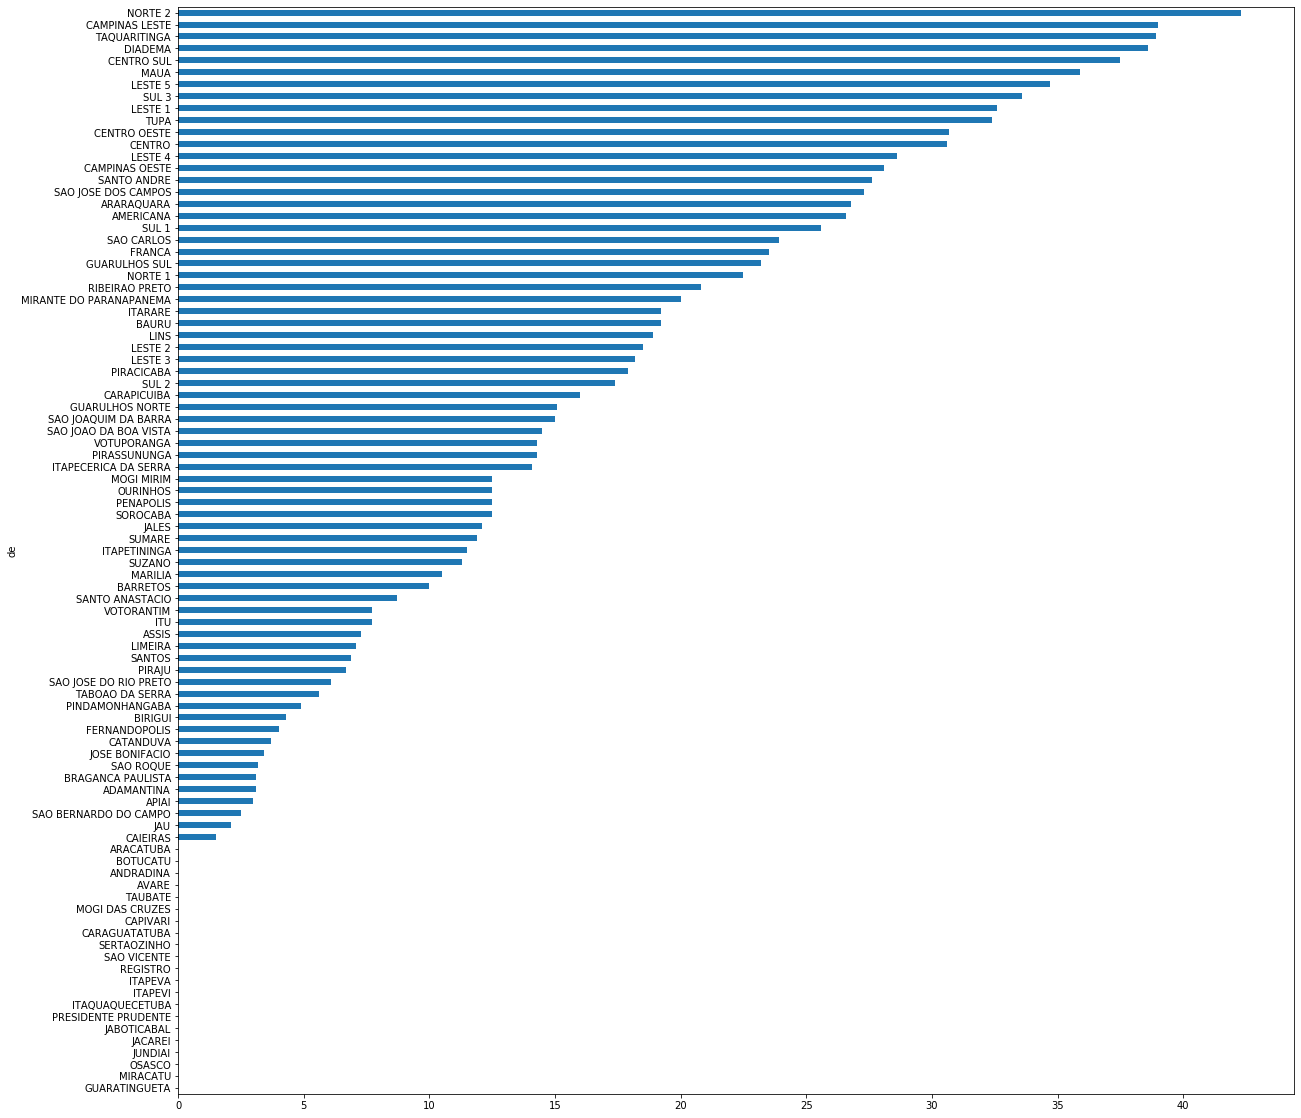

In [45]:
df_desempenho_de.sort_values('BOM')['BOM'].plot(kind='barh',figsize=(20,20))

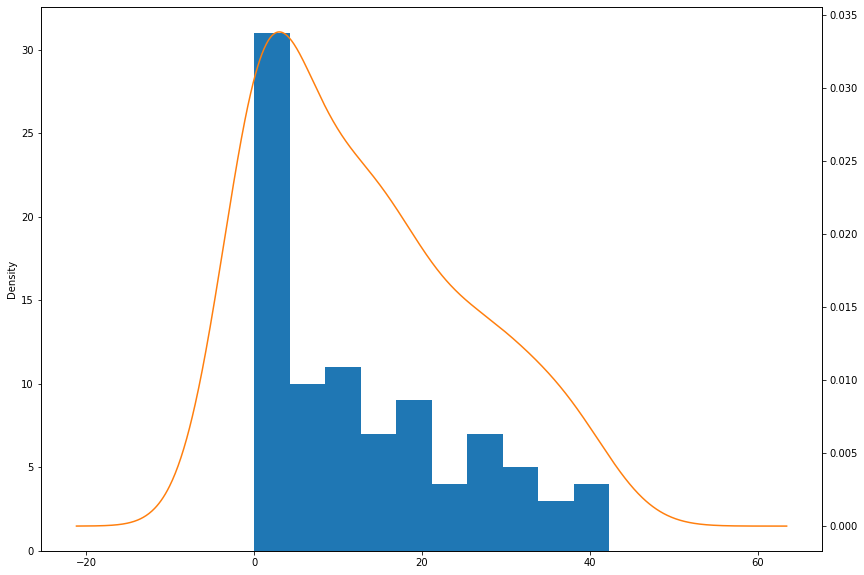

In [46]:
fig, ax = plt.subplots()
df_desempenho_de['BOM'].plot(kind='hist', bins=10, figsize=(14,10), ax=ax)
df_desempenho_de['BOM'].plot(kind='kde', ax=ax, secondary_y=True)

## Juntar com base BRAZIL_CITIES

### Limpar o nome dos municípios

In [48]:
df_cidades['CITY'] = df_cidades['CITY'].apply(lambda x: unidecode(x.upper().replace('-', ' ')))

In [49]:
df_cidades = df_cidades.drop_duplicates(subset=['STATE', 'CITY'])

In [50]:
data['mun'] = data['mun'].apply(lambda x: unidecode(x.upper().replace('-', ' ')))

In [51]:
features_to_use = ['CITY', 'CAPITAL', 'AREA', 'ESTIMATED_POP', 'RURAL_URBAN', 'GVA_PUBLIC', ' GVA_TOTAL ', 'GDP', 'GDP_CAPITA', 'COMP_H', 'COMP_O', 'COMP_P', 'COMP_Q']

In [53]:
data = pd.merge(data, df_cidades[features_to_use], left_on='mun', right_on='CITY', how='left')

## Análise Geoespacial

### Leitura do shapefile de São Paulo
Dados de: http://www.usp.br/nereus/?dados=unidades-federativas

In [55]:
# http://www.usp.br/nereus/?dados=unidades-federativas
gdf_sp = gpd.read_file('../data/external/SP-MUN')

### Criação dos pontos georreferenciados

In [56]:
data['Points'] = data.apply(lambda x: Point(x['LONGITUDE'], x['LATITUDE']), axis=1)

In [57]:
gdf_points = gpd.GeoDataFrame(data, geometry='Points')

## Visualização das escolas no mapa

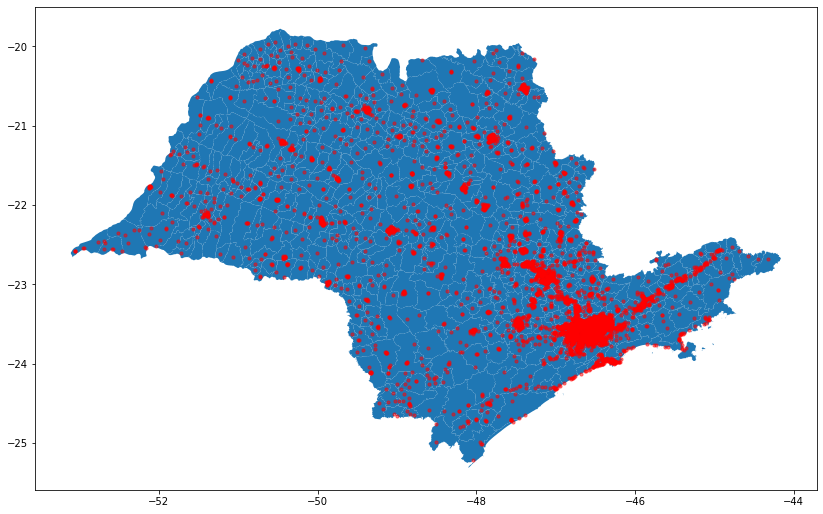

In [58]:
ax = gdf_sp.plot(figsize=(14, 18))
gdf_points.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.show()

### Análise georreferenciada do desempenho escolar 

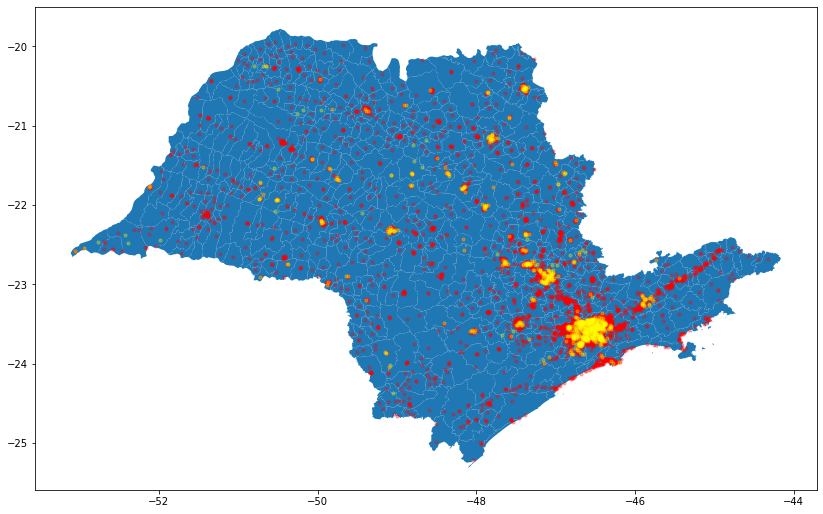

In [69]:
ax = gdf_sp.plot(figsize=(14, 18))
gdf_points[gdf_points['DESEMPENHO'] == 'RUIM'].plot(ax=ax, markersize=10, color='red', alpha=0.3)
gdf_points[gdf_points['DESEMPENHO'] == 'BOM'].plot(ax=ax, markersize=10, color='yellow', alpha=0.3)
plt.show()

### Criação de Zonas através de Clusterização
A quantidade de municípios é bastante elavada, a partir da técnica Clusterização (ou *clustering*) de Machine Learning, é possível criar grupos de acordo com a similaridade. Para isso, será utilizado as informações de Latitude e Longitude, e os grupos criados serão as escolas próximas. Criando um conceito de zona, onde o valor é previamente fixado. As zonas criadas são análisadas serão atributos do modelo preditivo.

In [70]:
from sklearn.cluster import KMeans

In [71]:
kmeans = KMeans(n_clusters=20, n_jobs=-1)

In [73]:
df_coordenadas = data[['LONGITUDE', 'LATITUDE']]

In [74]:
clusters = kmeans.fit_predict(df_coordenadas)

In [75]:
df_result = pd.concat([data, pd.Series(clusters, name='CLUSTER')], axis=1)
df_result.head()

,nomedep,depadm,mun,codmun,de,CD_ESCOLA,CD_DIRETORIA,CD_DIRETORIA_ESTADUAL,CD_DIRETORIA_SUPVS_PROPR,NM_COMPLETO_ESCOLA,CD_UNIDADE,DS_ENDERECO,COMPLEMENTO,NUMERO,CD_ORIGEM_UNIDADE,CD_ORIGEM_ESCOLA,CD_ORIGEM_ENDERECO,LATITUDE,LONGITUDE,CODESC,BOM,RUIM,DESEMPENHO,CITY,CAPITAL,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_PUBLIC,GVA_TOTAL,GDP,GDP_CAPITA,COMP_H,COMP_O,COMP_P,COMP_Q,Points,CLUSTER
0,ESTADUAL - SE,1,SAO PAULO,100,NORTE 1,36444,10101,10101,10101,GENESIO DE ALMEIDA MOURA DOUTOR,37806,DOMINGOS AREVALO,RUA,862,37806,36444,37866,-23.447000,-46.696700,36444,1.0,7.0,RUIM,SAO PAULO,1,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,POINT (-46.69670 -23.44700),12
1,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,1582,10205,10205,10205,DOMINGOS FAUSTINO SARMIENTO,24902,21 DE ABRIL,RUA,970,24902,1582,24962,-23.542232,-46.605793,1582,3.0,1.0,BOM,SAO PAULO,1,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,POINT (-46.60579 -23.54223),12
2,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,2173,10205,10205,10205,JOAO BORGES PROFESSOR,24901,ITAPURA,RUA,976,24901,2173,24961,-23.547300,-46.566000,2173,0.0,4.0,RUIM,SAO PAULO,1,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,POINT (-46.56600 -23.54730),0
3,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,3086,10207,10207,10207,HELENA LOMBARDI BRAGA PROFESSORA,24918,VIRGINIA DE MIRANDA,RUA,138,24918,3086,24978,-23.526587,-46.452888,3086,0.0,4.0,RUIM,SAO PAULO,1,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,POINT (-46.45289 -23.52659),0
4,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,2884,10207,10207,10207,RAUL PILLA DEPUTADO,24923,RUA SAO BERTOLDO,RUA,449,24923,2884,24983,-23.494297,-46.457064,2884,0.0,2.0,RUIM,SAO PAULO,1,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,POINT (-46.45706 -23.49430),0


In [28]:
df_coordenadas = data[['LONGITUDE', 'LATITUDE']]

In [44]:
clusters = kmeans.fit_predict(df_coordenadas)

In [45]:
df_result = pd.concat([data, pd.Series(clusters, name='CLUSTER')], axis=1)
df_result.head()

,nomedep,depadm,mun,codmun,de,CD_ESCOLA,CD_DIRETORIA,CD_DIRETORIA_ESTADUAL,CD_DIRETORIA_SUPVS_PROPR,NM_COMPLETO_ESCOLA,CD_UNIDADE,DS_ENDERECO,COMPLEMENTO,NUMERO,CD_ORIGEM_UNIDADE,CD_ORIGEM_ESCOLA,CD_ORIGEM_ENDERECO,LATITUDE,LONGITUDE,CITY,CAPITAL,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_PUBLIC,GVA_TOTAL,GDP,GDP_CAPITA,COMP_H,COMP_O,COMP_P,COMP_Q,Points,CLUSTER
0,ESTADUAL - SE,1,SAO PAULO,100,NORTE 1,36444,10101,10101,10101,GENESIO DE ALMEIDA MOURA DOUTOR,37806,DOMINGOS AREVALO,RUA,862,37806,36444,37866,-23.447000,-46.696700,SAO PAULO,1,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,POINT (-46.6967 -23.447),14
1,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,1582,10205,10205,10205,DOMINGOS FAUSTINO SARMIENTO,24902,21 DE ABRIL,RUA,970,24902,1582,24962,-23.542232,-46.605793,SAO PAULO,1,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,POINT (-46.6057931815944 -23.5422317000605),14
2,ESTADUAL - SE,1,SAO PAULO,100,LESTE 5,2173,10205,10205,10205,JOAO BORGES PROFESSOR,24901,ITAPURA,RUA,976,24901,2173,24961,-23.547300,-46.566000,SAO PAULO,1,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,POINT (-46.566 -23.5473),7
3,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,3086,10207,10207,10207,HELENA LOMBARDI BRAGA PROFESSORA,24918,VIRGINIA DE MIRANDA,RUA,138,24918,3086,24978,-23.526587,-46.452888,SAO PAULO,1,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,POINT (-46.45288789999999 -23.5265873),7
4,ESTADUAL - SE,1,SAO PAULO,100,LESTE 1,2884,10207,10207,10207,RAUL PILLA DEPUTADO,24923,RUA SAO BERTOLDO,RUA,449,24923,2884,24983,-23.494297,-46.457064,SAO PAULO,1,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,POINT (-46.4570641 -23.4942965),7


In [46]:
df_result['CLUSTER'] = df_result['CLUSTER'].astype(str)

### Visualização dos grupos criados

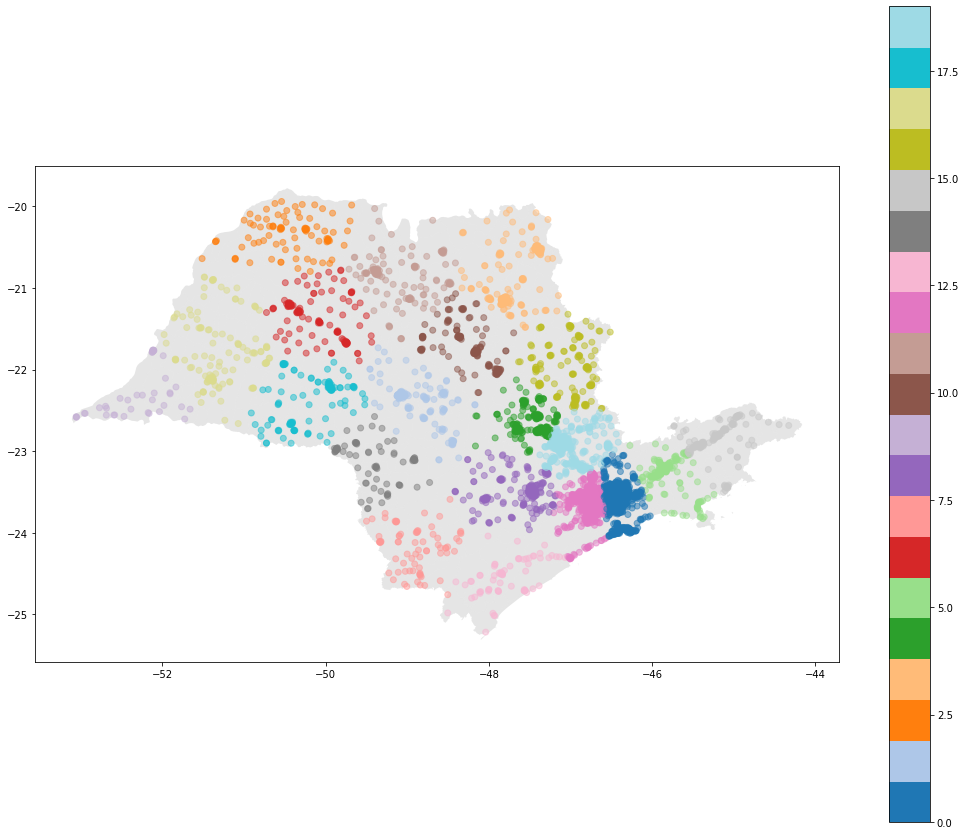

In [83]:
gdf_result = gpd.GeoDataFrame(df_result, geometry='Points')
ax = gdf_sp.plot(figsize=(18, 15), color='gray', alpha=0.2)
gdf_result.plot(column='CLUSTER', cmap='tab20', figsize=(18, 15), ax=ax, alpha=0.5, legend=True)
plt.show()

### Análise do desempenho por grupo

In [84]:
df_desempenho_cluster = df_result.groupby(['CLUSTER'])['DESEMPENHO'].value_counts(normalize=True).unstack().fillna(0)
df_desempenho_cluster

DESEMPENHO,BOM,RUIM
CLUSTER,,
0,0.194113,0.805887
1,0.110345,0.889655
2,0.077778,0.922222
3,0.189573,0.810427
4,0.185039,0.814961
5,0.120690,0.879310
6,0.107438,0.892562
7,0.077922,0.922078
8,0.090498,0.909502


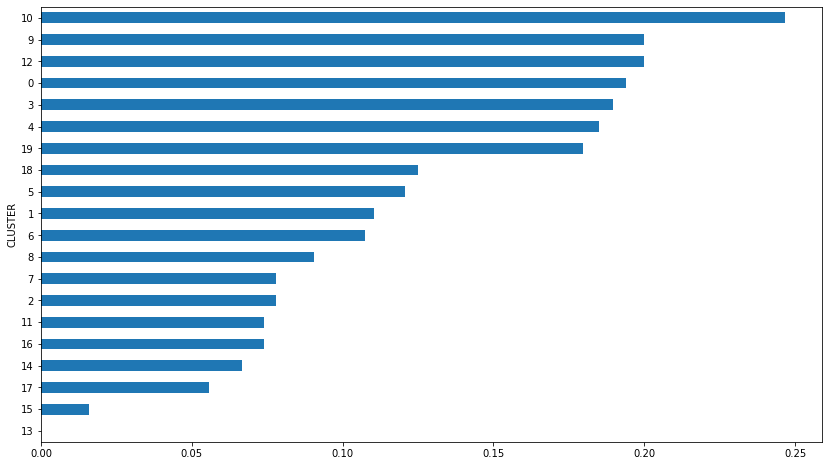

In [85]:
df_desempenho_cluster.sort_values('BOM')['BOM'].plot(kind='barh', figsize=(14,8))

## Exportar dados

In [86]:
df_result.to_csv('../data/processed/localizacao.csv', index=False)